In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

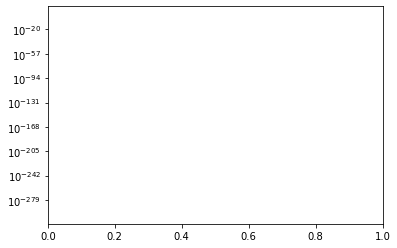

In [2]:
np.set_printoptions(suppress=True)
plt.yscale('log')

## Function setup

In [3]:
n = 8

$A$

In [4]:
# A = np.random.randn(n, n)
A = np.diag(np.random.uniform(size=n))
A = A.T.dot(A) / np.max(A)
print('A =', A, sep='\n')

A =
[[0.09552717 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.18231248 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.03078369 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.99804957 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.00986432 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.06229688
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05048721 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.58934285]]


$x = \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix}$

In [5]:
x_root_0 = np.zeros(n).reshape(n, 1)
x_root_1 = np.random.randn(n).reshape(n, 1) * 100
print('x_root_0 =', x_root_0, '', 'x_root_1 = ', x_root_1, sep='\n')

x_root_0 =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

x_root_1 = 
[[-100.98908904]
 [  -7.88998305]
 [  25.35718748]
 [-126.69106335]
 [ -19.48318281]
 [ -41.34354188]
 [ -46.41341938]
 [  93.60290689]]


$b = \begin{pmatrix} b_1 \\ ... \\ b_n \end{pmatrix}$

In [6]:
b = A.dot(x_root_1)
# print('b =', b, sep='\n')

### Testing purposes

(comment out to turn off)

In [7]:
# A = np.diag([1.0 for x in range(n)])
# A = np.array([[2, 0],
#               [0, 1]])
# A = A.T.dot(A)

# x_root_0 = np.zeros(n).reshape(n, 1)
# x_root_1 = np.array([1.0 for x in range(n)]).T.reshape(n, 1)

# b = A.dot(x_root_1)

# print('A =', A, sep='\n')
# print('b =', b, sep='\n')
# print('x_root_0 =', x_root_0, 'x_root_1 = ', x_root_1, sep='\n')

# x_min_theory = (x_root_0 + x_root_1) / 2

# print('x_min_theory =', x_min_theory, sep='\n')

$f(x) = x^{\top}Ax - b^{\top}x$

In [8]:
f = lambda x: (x.T).dot(A).dot(x) - (b.T).dot(x)

$\nabla f(x) = 2 Ax - b $

In [9]:
grad_f = lambda x: 2 * A.dot(x) - b

$\lambda_{1}, ..., \lambda_{n}$

In [10]:
A_eigenvalues = np.linalg.eigvalsh(A)
print('A_eigenvalues =', A_eigenvalues)

A_eigenvalues = [0.00986432 0.03078369 0.05048721 0.06229688 0.09552717 0.18231248
 0.58934285 0.99804957]


$L$ and $\mu$ (heavy-ball method)

In [11]:
L = np.max(A_eigenvalues)
mu = np.min(A_eigenvalues)
# print(f'L = {L}', f'mu = {mu}', sep='\n')

optimal $\alpha$ and $\beta$ values (heavy-ball method)

In [12]:
alpha_optimal = 4 / (
    (np.sqrt(L) + np.sqrt(mu)) ** 2
)

beta_optimal = (
    ( (np.sqrt(L) - np.sqrt(mu)) ** 2 ) /
    ( (np.sqrt(L) + np.sqrt(mu)) ** 2 )
)

print(f'alpha_optimal = {alpha_optimal}', f'beta_optimal = {beta_optimal}', sep='\n')

alpha_optimal = 3.315763460143083
beta_optimal = 0.6710020315027824


## Gradient descent

In [13]:
# def GradientDescentMethod(f, x0, epsilon, **kwargs):
#     x = x0
#     while StopCriterion(x, f, **kwargs) > epsilon:
#         h = ComputeGradient(x, f, **kwargs)
#         alpha = SelectStepSize(x, h, f, **kwargs)
#         x = x - alpha * h
#     return x

In [14]:
def gradient_descent(f, grad_f, x0=[[0], [0]],
                     epsilon=10**(-4),
                     num_iter=10001,
                     alpha=0.1):    
    x = np.array(x0)
    x_prev = x
    
    x_history = [x]

    for iteration in tqdm(range(1, num_iter)):
        x = x - alpha * grad_f(x)
        x_history.append(x)
        
        tol = np.linalg.norm(x - x_prev)
        if tol < epsilon:
            break
        x_prev = x

    return {"x": x, "iterations": iteration, "tolerance": tol}, x_history

In [69]:
x = [[0] for i in range(n)]
grad_res, x_history = gradient_descent(
    f, grad_f, x0=x,
    epsilon=10**(-8),
    num_iter=100,
    alpha=0.1,
)
x = grad_res['x']
print(grad_res)


{'x': array([[-43.01534789],
       [ -3.84521237],
       [  5.79931472],
       [-63.34553166],
       [ -1.72993124],
       [-14.69702131],
       [-14.70970678],
       [ 46.80126375]]), 'iterations': 99, 'tolerance': 0.19104288050652976}


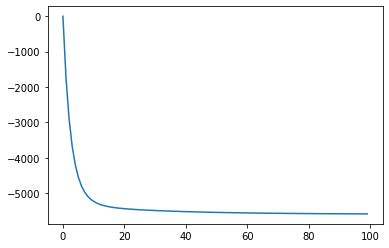

In [71]:
X = [i for i in range(len(x_history))]
Y = [f(i).flatten()[0] for i in x_history]

plt.plot(X, Y)

In [17]:
print('f(x) =', f(x))

f(x) = [[-5588.50617669]]


## Heavy Ball Method

In [18]:
# class HeavyBall(base.LineSearchOptimizer):
#     ...
#
#     def get_direction(self, x):
#         self._current_grad = self._grad(x)
#         return -self._current_grad
#
#     def _f_update_x_next(self, x, alpha, h):
#         if len(self.convergence) < 2:
#             return x + alpha * h
#         else:
#             return x + alpha * h + self._beta * (x - self.convergence[-2])
#
#     def get_stepsize(self):
#         return self._step_size.get_stepsize(self._grad_mem[-1],
#                                             self.convergence[-1],
#                                             len(self.convergence))

In [19]:
def heavy_ball_basic(f, grad_f, x0,
                     epsilon,
                     num_iter,
                     alpha,
                     beta):
    x = [np.array(x0).copy(),
         np.array(x0).copy()]
    
    x_history = [x[0]]
    
    for iteration in tqdm(range(1, num_iter)):
        x.append( x[-1] - alpha * grad_f(x[-1]) + beta * (x[-1] - x[-2]) )
        
        x_history.append(x[-1])
        
#         print(x[0].flatten())
        
        tol = np.linalg.norm(x[-1] - x[-2])
        if tol < epsilon:
            break

        del x[0]

    return {"x": x[-1], "iterations": iteration, "tolerance": tol}, x_history

In [58]:
x = [[0.0] for i in range(n)]
grad_res, x_history = heavy_ball_basic(
    f, grad_f, x0=x,
    epsilon=10**(-16),
    num_iter=100,
    alpha=0.1,
    beta=0.9,
)
x = grad_res['x']
print(grad_res)


{'x': array([[-50.21055518],
       [ -3.92421571],
       [ 12.62562276],
       [-63.37159795],
       [ -8.67673198],
       [-20.79188458],
       [-23.26750274],
       [ 47.0529146 ]]), 'iterations': 99, 'tolerance': 0.16752359003863687}


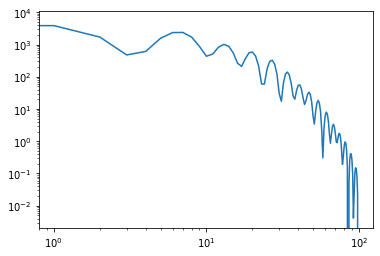

In [59]:
X = [i for i in range(len(x_history))]
Y = [f(i).flatten()[0] for i in x_history]

Y = [x - f(x_history[-1]).flatten()[0] for x in Y]

plt.loglog(X, Y)

In [22]:
print('f(x) =', f(x))

f(x) = [[-5601.75250424]]


## Heavy Ball Method with average tolerance

In [23]:
def heavy_ball_average(f, grad_f, x0,
                       epsilon,
                       num_iter,
                       alpha,
                       beta):
    x = [np.array(x0).copy(),
         np.array(x0).copy()]
    
    prev_avg = x0
    
    x_history = [prev_avg]
    
    for iteration in tqdm(range(1, num_iter)):
        x.append( x[-1] - alpha * grad_f(x[-1]) + beta * (x[-1] - x[-2]) )
        

        curr_avg = (prev_avg  + x[-1] / iteration) * iteration / (iteration + 1)
#         print(x[0].flatten())

        x_history.append(curr_avg)
        
        tol = np.linalg.norm(curr_avg - prev_avg)
        if tol < epsilon:
            break

        del x[0]
        prev_avg = curr_avg

    return {"x": curr_avg, "iterations": iteration, "tolerance": tol}, x_history

In [31]:
x = [[0.0] for i in range(n)]
grad_res, x_history = heavy_ball_average(
    f, grad_f, x0=x,
    epsilon=10**(-16),
    num_iter=100,
    alpha=0.1,
    beta=0.9,
)
x = grad_res['x']
print(grad_res)


{'x': array([[-47.85434401],
       [ -3.83729732],
       [ 10.63000775],
       [-63.02096361],
       [ -5.20395206],
       [-19.01058288],
       [-20.89495463],
       [ 46.40563468]]), 'iterations': 99, 'tolerance': 0.05619095004203436}


In [32]:
print('f(x) =', f(x))

f(x) = [[-5600.17109007]]


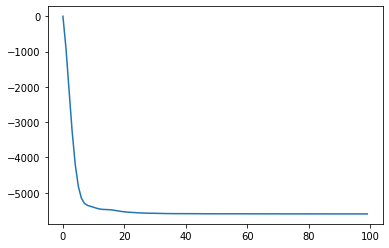

In [34]:
X = np.array([i for i in range(len(x_history))])
Y = [f(np.array(i)).flatten()[0] for i in x_history]

plt.plot(X, Y)

In [80]:
x = [[0] for i in range(n)]
grad_res, x_history = gradient_descent(
    f, grad_f, x0=x,
    epsilon=10**(-8),
    num_iter=100,
    alpha=0.1,
)
x = grad_res['x']

X1 = np.array([i for i in range(len(x_history))])
Y1 = [f(np.array(i)).flatten()[0] for i in x_history]

In [81]:
x = [[0.0] for i in range(n)]
grad_res, x_history = heavy_ball_basic(
    f, grad_f, x0=x,
    epsilon=10**(-16),
    num_iter=100,
    alpha=0.1,
    beta=0.9,
)
x = grad_res['x']

X2 = np.array([i for i in range(len(x_history))])
Y2 = [f(np.array(i)).flatten()[0] for i in x_history]

In [82]:
x = [[0.0] for i in range(n)]
grad_res, x_history = heavy_ball_basic(
    f, grad_f, x0=x,
    epsilon=10**(-16),
    num_iter=100,
    alpha=0.1,
    beta=0.9,
)
x = grad_res['x']

X3 = np.array([i for i in range(len(x_history))])
Y3 = [f(np.array(i)).flatten()[0] for i in x_history]

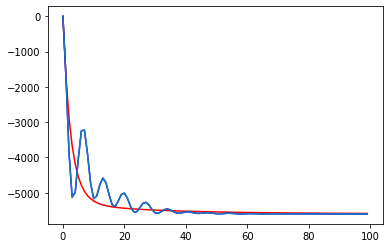

In [86]:
# plt.plot(X1, Y1, X2, Y2, X3, Y3)
plt.plot(X1, Y1, color='red')
plt.plot(X2, Y2, color='blue')
plt.plot(X3, Y3, color='gr')